## Systematics relations

In [1]:
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

savefigs = True

### 1 systematic effect

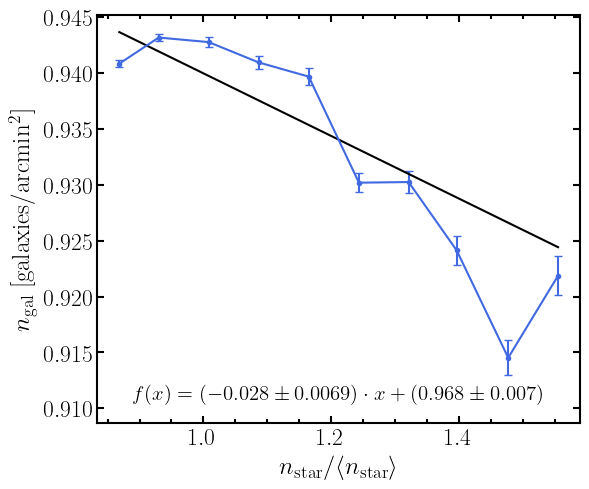

$f(x) = (-0.02803 \pm 0.00689)\cdot x + (0.968 \pm 0.007)$


In [2]:
df = pd.read_csv('sysrels_1systematic.data')
nstar = df['nstar: temp_vals'].to_numpy()
ngal = df['nstar: ngal'].to_numpy()*0.94
ngal_unc = df['nstar: ngal unc'].to_numpy()*0.94


## fit linear function
def fit(x, a, b):
    return a*x + b
pars, cov = so.curve_fit(fit, xdata=nstar, ydata=ngal, sigma=ngal_unc)
errors = np.sqrt(np.diag(cov))


fig, ax = plt.subplots(ncols=1, figsize=(6,5))
plt.errorbar(nstar, ngal, ngal_unc, marker='.', linestyle='-', color='royalblue', capsize=3)
plt.plot(nstar, fit(nstar, *pars), color='black', label=f'$f(x) = ({round(pars[0], 4)} \\pm {round(errors[0], 4)})\\cdot x + ({round(pars[1], 3)} \\pm {round(errors[1], 3)})$')
plt.ylim(ymin=0.983*min(fit(nstar, *pars)))

plt.xlabel('$n_{\\mathrm{star}}/\\langle n_{\\mathrm{star}}\\rangle$', fontsize=18)
plt.ylabel('$n_{\\mathrm{gal}}$   [galaxies/arcmin$^2$]', fontsize=18)
leg = plt.legend(frameon=False, handlelength=0, markerscale=0)
for item in leg.legend_handles:
    item.set_visible(False)
plt.tight_layout()    
if savefigs:
    plt.savefig('../figs_thesis/input_sysrel_singlesystematic_fiducial.png')
plt.show()
print(f'$f(x) = ({round(pars[0], 5)} \\pm {round(errors[0], 5)})\\cdot x + ({round(pars[1], 3)} \\pm {round(errors[1], 3)})$')

### 3 systematic effects

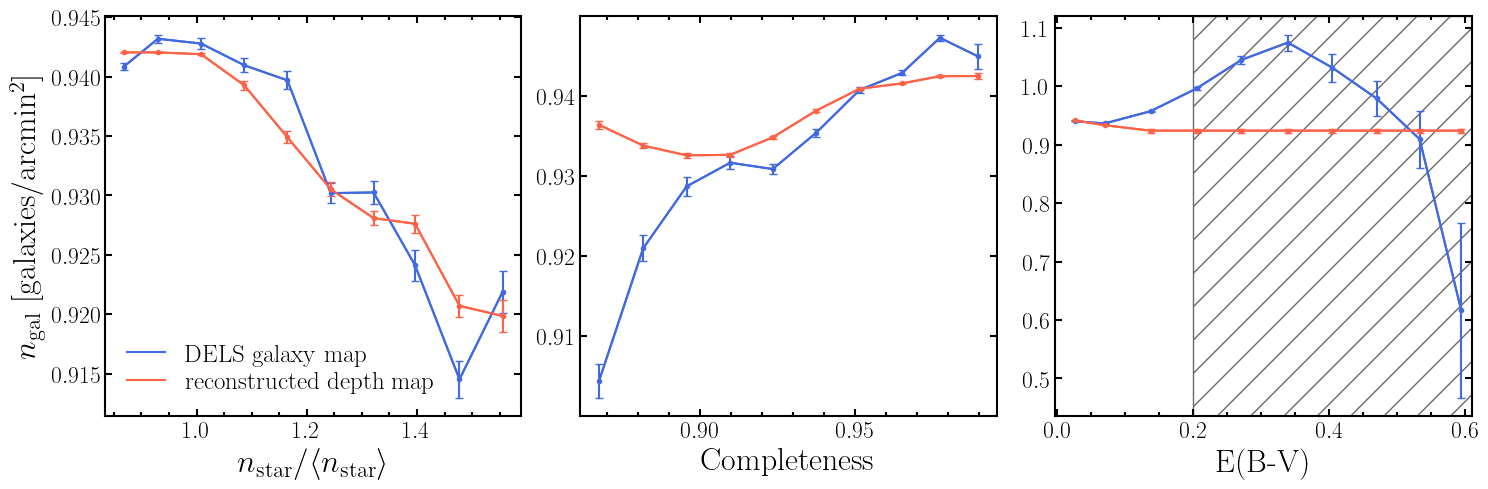

In [10]:
df = pd.read_csv('sysrels_3systematics.data')
#df_10clust = pd.read_csv('sysrels_3systematics_10clust.data')
df_10clust = pd.read_csv('sysrels_3systematics_10clust.data')


key_names = ['nstar', 'completeness', 'extinction']
label_names = ['$n_\\mathrm{star}/\\langle n_\\mathrm{star}\\rangle$', 'Completeness', 'E(B-V)']

temps_names = ['$n_{star}$', 'completeness', 'extinction']

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

for i, (key, label) in enumerate(zip(key_names, label_names)):
    temp = df[f'{key}: temp_vals'].to_numpy()
    ngal = df[f'{key}: ngal'].to_numpy()*0.94
    ngal_unc = df[f'{key}: ngal unc'].to_numpy()*0.94
    
    ngal_10clust = df_10clust[f'{key}: ngal'].to_numpy()*0.94
    ngal_10clust_unc = df_10clust[f'{key}: ngal unc'].to_numpy()*0.94   

    plt.axes(ax[i])
    plt.plot(temp, ngal, linestyle='-', color='royalblue', label='DELS galaxy map')
    plt.errorbar(temp, ngal, ngal_unc, marker='.', linestyle='-', color='royalblue', capsize=3)
    plt.plot(temp, ngal_10clust, linestyle='-', color='tomato', label='reconstructed depth map')
    plt.errorbar(temp, ngal_10clust, ngal_10clust_unc, marker='.', linestyle='-', color='tomato', capsize=3)
    #plt.ylim(ymin=0.983*min(fit(nstar, *pars)))
    if i ==2:
        plt.axvspan(0.2, 0.61, hatch='/', ec='dimgrey', fc='white')
        plt.xlim(xmax=0.61)

    plt.xlabel(f'{label}', fontsize=23)
    
    if i == 0:
        plt.legend(frameon=False, fontsize=18, loc='lower left')
        plt.ylabel('$n_\\mathrm{gal}$   [galaxies/arcmin$^2$]', fontsize=23)
plt.tight_layout()
if savefigs:
    plt.savefig('../figs_thesis/input_sysrel_SOM.png')
plt.show()

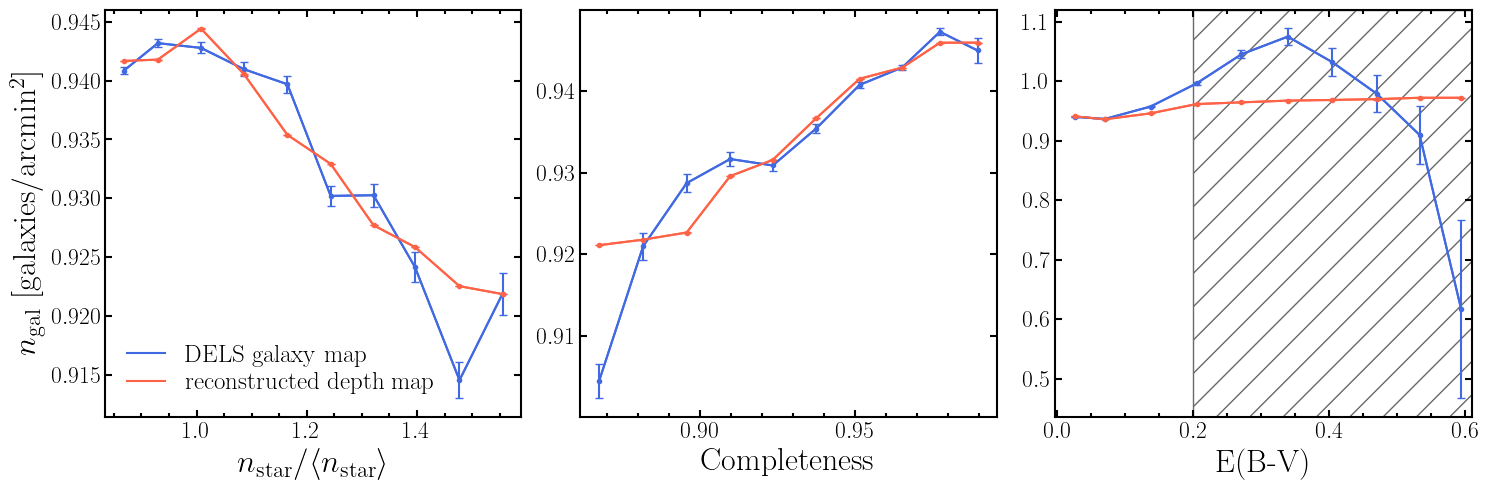

In [9]:
df = pd.read_csv('sysrels_3systematics.data')
df_10clust = pd.read_csv('sysrels_3systematics_20clust.data')


key_names = ['nstar', 'completeness', 'extinction']
label_names = ['$n_\\mathrm{star}/\\langle n_{\\mathrm{star}}\\rangle$', 'Completeness', 'E(B-V)']

temps_names = ['$n_{star}$', 'completeness', 'extinction']

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

for i, (key, label) in enumerate(zip(key_names, label_names)):
    temp = df[f'{key}: temp_vals'].to_numpy()
    ngal = df[f'{key}: ngal'].to_numpy()*0.94
    ngal_unc = df[f'{key}: ngal unc'].to_numpy()*0.94
    
    ngal_10clust = df_10clust[f'{key}: ngal'].to_numpy()*0.94
    ngal_10clust_unc = df_10clust[f'{key}: ngal unc'].to_numpy()*0.94    
    
    

    plt.axes(ax[i])
    plt.plot(temp, ngal, linestyle='-', color='royalblue', label='DELS galaxy map')
    plt.errorbar(temp, ngal, ngal_unc, marker='.', linestyle='-', color='royalblue', capsize=3)
    plt.plot(temp, ngal_10clust, linestyle='-', color='tomato', label='reconstructed depth map')
    plt.errorbar(temp, ngal_10clust, ngal_10clust_unc, marker='.', linestyle='-', color='tomato', capsize=3)
    #plt.ylim(ymin=0.983*min(fit(nstar, *pars)))
    if i ==2:
        plt.axvspan(0.2, 0.61, hatch='/', ec='dimgrey', fc='white')
        plt.xlim(xmax=0.61)
    plt.xlabel(f'{label}', fontsize=23)
    
    if i == 0:
        plt.legend(frameon=False, fontsize=18, loc='lower left')
        plt.ylabel('$n_\\mathrm{gal}$   [galaxies/arcmin$^2$]', fontsize=23)
plt.tight_layout()
if savefigs:
    plt.savefig('../figs_thesis/input_sysrel_SOM_20clust.png')
plt.show()